# We will discover the best actor/director according to imdb ratings

First we import all the necessary libraries to process and plot data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

We read our data and use the actordirector variable as a choice for whether the user wants to find the best actor or director.

In [2]:

df = pd.read_csv('movie_metadata.csv')
actordirector = 'director_name' # actor_1_name
assert actordirector in ('actor_1_name','director_name'), 'Specify director_name or actor_1_name'
if actordirector == 'director_name':
    nrMovies = 10
elif actordirector == 'actor_1_name':
    nrMovies = 15

Using the groupby methds, we can group our data based on the feature chosen by the user (actordirector variable). Then we get statistics that help us sort them accordingly.

In [3]:
grouped = df.groupby(df[actordirector], as_index=False)
groupdf = grouped.imdb_score.agg([np.mean, np.std, len])    # mean, standard deviation, and nr-of-movies columns
groupdf['se'] = groupdf['std'] / np.sqrt(groupdf.len)       # standard error column
groupdf.dropna(axis=0, inplace=True)
groupdf = groupdf[groupdf.len>=nrMovies]                    # select actors/directors with more than nrMovies movies
groupdf.sort_values(['mean'],ascending=True,inplace=True)          # sorted by average imdb movie rating
groupdf.reset_index(inplace=True)
groupdf['names'] = groupdf.index

And there we have it. The beautiful plot in ggplot style, where we have ordered the actors/directors with more than 'nrMovies' movies, sorted by average imdb movie rating. One can of course use different kinds of performance measures to sort them.

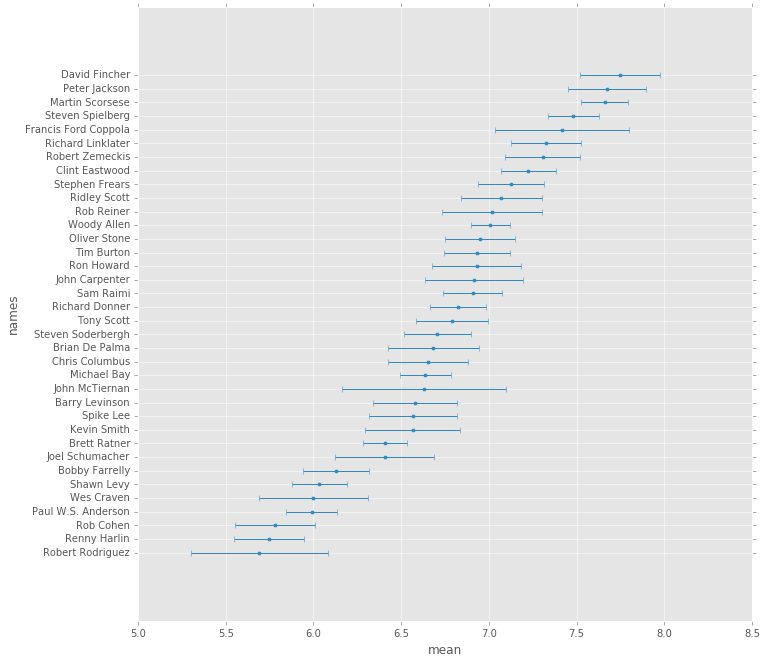

In [4]:
fig = groupdf.plot(kind='scatter', x='mean', y='names',yticks=range(len(groupdf)),xerr='se',figsize=(11,11))
fig.set_yticklabels(groupdf[actordirector]   , rotation=0)
plt.show()